### Importar libreria

In [1]:
from libreria import *
from pathlib import Path

RAW_DIR = Path("./data/raw")      # <‑‑ coloca los ZIP/CSV descargados aquí
PREP_DIR = Path("./data/processed")
PREP_DIR.mkdir(parents=True, exist_ok=True)

In [4]:
# Tamaño de muestra por archivo (None = carga completa). Empieza pequeño
SAMPLE_ROWS = 100_000  # ← ajusta o pon None para carga total más adelante

In [ ]:
DATASETS = {
    "II-2024": RAW_DIR / "CEEDEST_2024_T2.csv",
    "III-2024": RAW_DIR / "CEEDEST_2024_T3.csv",
    "IV-2024": RAW_DIR / "CEEDEST_2024_T4.csv",
}

#Solo se procesan tres trimestres

In [6]:
dfPrueba = concatenate_dfs(DATASETS, sample=SAMPLE_ROWS)

Cargando: 100%|██████████| 3/3 [00:47<00:00, 15.88s/it]


In [7]:
dfPrueba.shape

(300000, 81)

In [8]:
dfPrueba.write_csv(PREP_DIR / "dataset_prueba.csv")

## Lectura de la base de datos

In [2]:
df = pl.read_csv(PREP_DIR / "dataset_prueba.csv")
df.head()

CENSO_NUMERO,NOFORMULAR,DPTO_MPIO,ANO_CENSO,TRIMESTRE,DESTINO2,ESTADO_ACT,MOVIMIENTO,ESTRATO,LOCALIDAD2,AMPLIACION,MESINICIO,OB_FORMAL,USO,USO_DOS,AREATOTZC,MESREINICI,ANOREINICI,MESCULMINA,ANOCULMINA,AREAUNITGA,UNIDADESGA,PRECIOUNIG,TIPOVALOR,SIS_CONSTR,MANO_OBRAP,MANO_OBRAT,MANO_OBRAF,AREAVENDIB,NUMUNIDEST,NUMUNIVEN,NUMUNIXVEN,NRO_EDIFIC,NRO_PISOS,CAPITULO,GRADOAVANC,TIPOVRDEST,…,C1_EXCAVACION,C1_CIMENTACION,C1_DESAGUES,C2_ESTRUCTURA,C2_INST_HIDELEC,C2_CUBIERTA,C3_MAMPOSTERIA,C3_PANETE,C4_PISO_ENCHAPE,C4_CARP_METALICA,C4_CARP_MADERA,C4_CIELO_RASO,C5_VID_CERRAJERIA,C5_PINTURA,C6_REM_EXTERIORES,C6_REM_ACABADOS,C6_ASEO,CONS_ID,UNI_DEC_VIP,UNI_DEC_VIS,UNI_DEC_NOVIS,UNIDEC_RANVIVI_1,UNIDEC_RANVIVI_2,UNIDEC_RANVIVI_3,UNIDEC_RANVIVI_4,UNIDEC_RANVIVI_5,UNIDEC_RANVIVI_6,AREA_RANVIVI_1,AREA_RANVIVI_2,AREA_RANVIVI_3,AREA_RANVIVI_4,AREA_RANVIVI_5,AREA_RANVIVI_6,AREA_VIP,AREA_VIS,AREA_NOVIS,TRIMESTRE_REF
i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,str,i64,i64,i64,f64,i64,i64,i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str
64,248967,25473,2012,3,4,2,"""C""",2,0,2,"""01/04/2012""",2,2,3,0.0,null,null,null,null,null,null,null,null,2,0,0,0,66.0,1,0,0,1,1,2,100,2,…,100,100,100,100,100,100,0,0,0,0,0,0,0,0,0,0,0,48549,1,null,null,0,1,0,0,0,0,0.0,66.0,0.0,0.0,0.0,0.0,66.0,null,null,"""II-2024"""
75,68642,17001,2015,2,4,2,"""I""",2,5,1,"""01/03/2015""",2,2,3,0.0,null,null,null,null,null,null,null,null,2,0,0,0,73.0,1,0,0,1,1,1,100,1,…,100,100,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,110529,null,1,null,0,0,1,0,0,0,0.0,0.0,73.0,0.0,0.0,0.0,null,73.0,null,"""II-2024"""
99,97148,54001,2021,2,4,7,"""S""",2,0,1,"""01/04/2013""",2,2,3,0.0,null,null,null,null,null,null,null,null,2,0,0,0,20.0,1,0,0,1,1,3,100,2,…,100,100,100,100,100,100,100,100,0,0,0,0,0,0,0,0,0,177877,1,null,null,1,0,0,0,0,0,20.0,0.0,0.0,0.0,0.0,0.0,20.0,null,null,"""II-2024"""
64,39867,52001,2012,3,4,1,"""C""",2,4,1,"""01/03/2012""",2,2,3,0.0,null,null,null,null,null,null,null,null,2,0,1,0,40.0,1,0,0,1,1,5,10,1,…,100,100,100,100,100,100,100,100,100,100,100,100,10,10,0,0,0,151054,1,null,null,1,0,0,0,0,0,40.0,0.0,0.0,0.0,0.0,0.0,40.0,null,null,"""II-2024"""
76,204314,5001,2015,3,1,3,"""T""",2,8,2,"""01/09/2014""",2,2,1,30.0,null,null,8,2015,null,null,null,null,1,0,0,0,470.0,7,0,0,1,4,6,100,1,…,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,159286,null,7,null,0,0,0,7,0,0,0.0,0.0,0.0,500.0,0.0,0.0,null,500.0,null,"""II-2024"""


In [3]:
df = encode_column(df, "MOVIMIENTO")

In [4]:
df = df.with_columns(
    pl.col("MESINICIO").str.slice(-4).cast(pl.Int32).alias("ANIO_MESINICIO")
)

In [5]:
df.shape

(300000, 83)

In [6]:
ID_COLS = [
    "NOFORMULAR",    # id único de la obra/formulario
    "CONS_ID",       # id asociado a mano de obra
    "CENSO_NUMERO",   # (si también es secuencial)
    "MOVIMIENTO",    
    "MESINICIO",   
    "TRIMESTRE_REF" 
]
df = delate_column(df, ID_COLS)

In [7]:
df.head()

DPTO_MPIO,ANO_CENSO,TRIMESTRE,DESTINO2,ESTADO_ACT,ESTRATO,LOCALIDAD2,AMPLIACION,OB_FORMAL,USO,USO_DOS,AREATOTZC,MESREINICI,ANOREINICI,MESCULMINA,ANOCULMINA,AREAUNITGA,UNIDADESGA,PRECIOUNIG,TIPOVALOR,SIS_CONSTR,MANO_OBRAP,MANO_OBRAT,MANO_OBRAF,AREAVENDIB,NUMUNIDEST,NUMUNIVEN,NUMUNIXVEN,NRO_EDIFIC,NRO_PISOS,CAPITULO,GRADOAVANC,TIPOVRDEST,PRECIOVTAX,AREATOTCO2,AREAVENUNI,RANVIVI,…,C1_EXCAVACION,C1_CIMENTACION,C1_DESAGUES,C2_ESTRUCTURA,C2_INST_HIDELEC,C2_CUBIERTA,C3_MAMPOSTERIA,C3_PANETE,C4_PISO_ENCHAPE,C4_CARP_METALICA,C4_CARP_MADERA,C4_CIELO_RASO,C5_VID_CERRAJERIA,C5_PINTURA,C6_REM_EXTERIORES,C6_REM_ACABADOS,C6_ASEO,UNI_DEC_VIP,UNI_DEC_VIS,UNI_DEC_NOVIS,UNIDEC_RANVIVI_1,UNIDEC_RANVIVI_2,UNIDEC_RANVIVI_3,UNIDEC_RANVIVI_4,UNIDEC_RANVIVI_5,UNIDEC_RANVIVI_6,AREA_RANVIVI_1,AREA_RANVIVI_2,AREA_RANVIVI_3,AREA_RANVIVI_4,AREA_RANVIVI_5,AREA_RANVIVI_6,AREA_VIP,AREA_VIS,AREA_NOVIS,MOVIMIENTO_ENC,ANIO_MESINICIO
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,i64,i64,i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,i64,f64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i32
25473,2012,3,4,2,2,0,2,2,2,3,0.0,null,null,null,null,null,null,null,null,2,0,0,0,66.0,1,0,0,1,1,2,100,2,500.0,66,66.0,2,…,100,100,100,100,100,100,0,0,0,0,0,0,0,0,0,0,0,1,null,null,0,1,0,0,0,0,0.0,66.0,0.0,0.0,0.0,0.0,66.0,null,null,1,2012
17001,2015,2,4,2,2,5,1,2,2,3,0.0,null,null,null,null,null,null,null,null,2,0,0,0,73.0,1,0,0,1,1,1,100,1,720.0,73,73.0,3,…,100,100,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null,1,null,0,0,1,0,0,0,0.0,0.0,73.0,0.0,0.0,0.0,null,73.0,null,3,2015
54001,2021,2,4,7,2,0,1,2,2,3,0.0,null,null,null,null,null,null,null,null,2,0,0,0,20.0,1,0,0,1,1,3,100,2,750.0,20,20.0,1,…,100,100,100,100,100,100,100,100,0,0,0,0,0,0,0,0,0,1,null,null,1,0,0,0,0,0,20.0,0.0,0.0,0.0,0.0,0.0,20.0,null,null,6,2013
52001,2012,3,4,1,2,4,1,2,2,3,0.0,null,null,null,null,null,null,null,null,2,0,1,0,40.0,1,0,0,1,1,5,10,1,760.0,40,40.0,1,…,100,100,100,100,100,100,100,100,100,100,100,100,10,10,0,0,0,1,null,null,1,0,0,0,0,0,40.0,0.0,0.0,0.0,0.0,0.0,40.0,null,null,1,2012
5001,2015,3,1,3,2,8,2,2,2,1,30.0,null,null,8,2015,null,null,null,null,1,0,0,0,470.0,7,0,0,1,4,6,100,1,1000.0,500,67.142857,4,…,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,null,7,null,0,0,0,7,0,0,0.0,0.0,0.0,500.0,0.0,0.0,null,500.0,null,7,2014


In [8]:
df.shape

(300000, 77)

In [9]:
for col, dtype in zip(df.columns, df.dtypes):
    print(f"{col}: {dtype}")

DPTO_MPIO: Int64
ANO_CENSO: Int64
TRIMESTRE: Int64
DESTINO2: Int64
ESTADO_ACT: Int64
ESTRATO: Int64
LOCALIDAD2: Int64
AMPLIACION: Int64
OB_FORMAL: Int64
USO: Int64
USO_DOS: Int64
AREATOTZC: Float64
MESREINICI: Int64
ANOREINICI: Int64
MESCULMINA: Int64
ANOCULMINA: Int64
AREAUNITGA: Float64
UNIDADESGA: Int64
PRECIOUNIG: Int64
TIPOVALOR: Int64
SIS_CONSTR: Int64
MANO_OBRAP: Int64
MANO_OBRAT: Int64
MANO_OBRAF: Int64
AREAVENDIB: Float64
NUMUNIDEST: Int64
NUMUNIVEN: Int64
NUMUNIXVEN: Int64
NRO_EDIFIC: Int64
NRO_PISOS: Int64
CAPITULO: Int64
GRADOAVANC: Int64
TIPOVRDEST: Int64
PRECIOVTAX: Float64
AREATOTCO2: Int64
AREAVENUNI: Float64
RANVIVI: Int64
MEZ_OBRA: Int64
CONCRETO: Int64
LIC_RADICADO_SN: Int64
C1_EXCAVACION: Int64
C1_CIMENTACION: Int64
C1_DESAGUES: Int64
C2_ESTRUCTURA: Int64
C2_INST_HIDELEC: Int64
C2_CUBIERTA: Int64
C3_MAMPOSTERIA: Int64
C3_PANETE: Int64
C4_PISO_ENCHAPE: Int64
C4_CARP_METALICA: Int64
C4_CARP_MADERA: Int64
C4_CIELO_RASO: Int64
C5_VID_CERRAJERIA: Int64
C5_PINTURA: Int64


In [10]:
for col, nulos in val_nulos(df).items():
    print(f"{col}: {nulos}")

DPTO_MPIO: [0]
ANO_CENSO: [0]
TRIMESTRE: [0]
DESTINO2: [0]
ESTADO_ACT: [0]
ESTRATO: [0]
LOCALIDAD2: [0]
AMPLIACION: [4]
OB_FORMAL: [0]
USO: [0]
USO_DOS: [62411]
AREATOTZC: [0]
MESREINICI: [292334]
ANOREINICI: [292334]
MESCULMINA: [266874]
ANOCULMINA: [266878]
AREAUNITGA: [285236]
UNIDADESGA: [285327]
PRECIOUNIG: [285240]
TIPOVALOR: [285237]
SIS_CONSTR: [9089]
MANO_OBRAP: [0]
MANO_OBRAT: [0]
MANO_OBRAF: [2114]
AREAVENDIB: [0]
NUMUNIDEST: [0]
NUMUNIVEN: [0]
NUMUNIXVEN: [0]
NRO_EDIFIC: [0]
NRO_PISOS: [0]
CAPITULO: [0]
GRADOAVANC: [0]
TIPOVRDEST: [0]
PRECIOVTAX: [0]
AREATOTCO2: [0]
AREAVENUNI: [0]
RANVIVI: [0]
MEZ_OBRA: [195043]
CONCRETO: [195044]
LIC_RADICADO_SN: [65161]
C1_EXCAVACION: [12864]
C1_CIMENTACION: [12834]
C1_DESAGUES: [9447]
C2_ESTRUCTURA: [1076]
C2_INST_HIDELEC: [1015]
C2_CUBIERTA: [1079]
C3_MAMPOSTERIA: [1732]
C3_PANETE: [4595]
C4_PISO_ENCHAPE: [4493]
C4_CARP_METALICA: [1715]
C4_CARP_MADERA: [13990]
C4_CIELO_RASO: [15645]
C5_VID_CERRAJERIA: [1016]
C5_PINTURA: [5070]
C6_REM_E

In [11]:
df_combined, cols_out = drop_high_nulls(df, 0.70)

🗑️  Columnas eliminadas (+70% nulos): MESREINICI (Int64), ANOREINICI (Int64), MESCULMINA (Int64), ANOCULMINA (Int64), AREAUNITGA (Float64), UNIDADESGA (Int64), PRECIOUNIG (Int64), TIPOVALOR (Int64), UNI_DEC_VIP (Int64), UNI_DEC_VIS (Int64), AREA_VIP (Float64), AREA_VIS (Float64)


In [12]:
df_combined.head()

DPTO_MPIO,ANO_CENSO,TRIMESTRE,DESTINO2,ESTADO_ACT,ESTRATO,LOCALIDAD2,AMPLIACION,OB_FORMAL,USO,USO_DOS,AREATOTZC,SIS_CONSTR,MANO_OBRAP,MANO_OBRAT,MANO_OBRAF,AREAVENDIB,NUMUNIDEST,NUMUNIVEN,NUMUNIXVEN,NRO_EDIFIC,NRO_PISOS,CAPITULO,GRADOAVANC,TIPOVRDEST,PRECIOVTAX,AREATOTCO2,AREAVENUNI,RANVIVI,MEZ_OBRA,CONCRETO,LIC_RADICADO_SN,C1_EXCAVACION,C1_CIMENTACION,C1_DESAGUES,C2_ESTRUCTURA,C2_INST_HIDELEC,C2_CUBIERTA,C3_MAMPOSTERIA,C3_PANETE,C4_PISO_ENCHAPE,C4_CARP_METALICA,C4_CARP_MADERA,C4_CIELO_RASO,C5_VID_CERRAJERIA,C5_PINTURA,C6_REM_EXTERIORES,C6_REM_ACABADOS,C6_ASEO,UNI_DEC_NOVIS,UNIDEC_RANVIVI_1,UNIDEC_RANVIVI_2,UNIDEC_RANVIVI_3,UNIDEC_RANVIVI_4,UNIDEC_RANVIVI_5,UNIDEC_RANVIVI_6,AREA_RANVIVI_1,AREA_RANVIVI_2,AREA_RANVIVI_3,AREA_RANVIVI_4,AREA_RANVIVI_5,AREA_RANVIVI_6,AREA_NOVIS,MOVIMIENTO_ENC,ANIO_MESINICIO
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,i64,i64,i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,i32
25473,2012,3,4,2,2,0,2,2,2,3,0.0,2,0,0,0,66.0,1,0,0,1,1,2,100,2,500.0,66,66.0,2,null,null,2,100,100,100,100,100,100,0,0,0,0,0,0,0,0,0,0,0,null,0,1,0,0,0,0,0.0,66.0,0.0,0.0,0.0,0.0,null,1,2012
17001,2015,2,4,2,2,5,1,2,2,3,0.0,2,0,0,0,73.0,1,0,0,1,1,1,100,1,720.0,73,73.0,3,null,null,2,100,100,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null,0,0,1,0,0,0,0.0,0.0,73.0,0.0,0.0,0.0,null,3,2015
54001,2021,2,4,7,2,0,1,2,2,3,0.0,2,0,0,0,20.0,1,0,0,1,1,3,100,2,750.0,20,20.0,1,null,null,2,100,100,100,100,100,100,100,100,0,0,0,0,0,0,0,0,0,null,1,0,0,0,0,0,20.0,0.0,0.0,0.0,0.0,0.0,null,6,2013
52001,2012,3,4,1,2,4,1,2,2,3,0.0,2,0,1,0,40.0,1,0,0,1,1,5,10,1,760.0,40,40.0,1,null,null,2,100,100,100,100,100,100,100,100,100,100,100,100,10,10,0,0,0,null,1,0,0,0,0,0,40.0,0.0,0.0,0.0,0.0,0.0,null,1,2012
5001,2015,3,1,3,2,8,2,2,2,1,30.0,1,0,0,0,470.0,7,0,0,1,4,6,100,1,1000.0,500,67.142857,4,2,2,2,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,null,0,0,0,7,0,0,0.0,0.0,0.0,500.0,0.0,0.0,null,7,2014


In [13]:
df_combined.shape

(300000, 65)

In [14]:
for col, nulos in val_nulos(df_combined).items():
    print(f"{col}: {nulos}")

DPTO_MPIO: [0]
ANO_CENSO: [0]
TRIMESTRE: [0]
DESTINO2: [0]
ESTADO_ACT: [0]
ESTRATO: [0]
LOCALIDAD2: [0]
AMPLIACION: [4]
OB_FORMAL: [0]
USO: [0]
USO_DOS: [62411]
AREATOTZC: [0]
SIS_CONSTR: [9089]
MANO_OBRAP: [0]
MANO_OBRAT: [0]
MANO_OBRAF: [2114]
AREAVENDIB: [0]
NUMUNIDEST: [0]
NUMUNIVEN: [0]
NUMUNIXVEN: [0]
NRO_EDIFIC: [0]
NRO_PISOS: [0]
CAPITULO: [0]
GRADOAVANC: [0]
TIPOVRDEST: [0]
PRECIOVTAX: [0]
AREATOTCO2: [0]
AREAVENUNI: [0]
RANVIVI: [0]
MEZ_OBRA: [195043]
CONCRETO: [195044]
LIC_RADICADO_SN: [65161]
C1_EXCAVACION: [12864]
C1_CIMENTACION: [12834]
C1_DESAGUES: [9447]
C2_ESTRUCTURA: [1076]
C2_INST_HIDELEC: [1015]
C2_CUBIERTA: [1079]
C3_MAMPOSTERIA: [1732]
C3_PANETE: [4595]
C4_PISO_ENCHAPE: [4493]
C4_CARP_METALICA: [1715]
C4_CARP_MADERA: [13990]
C4_CIELO_RASO: [15645]
C5_VID_CERRAJERIA: [1016]
C5_PINTURA: [5070]
C6_REM_EXTERIORES: [4123]
C6_REM_ACABADOS: [5283]
C6_ASEO: [1080]
UNI_DEC_NOVIS: [201467]
UNIDEC_RANVIVI_1: [0]
UNIDEC_RANVIVI_2: [0]
UNIDEC_RANVIVI_3: [0]
UNIDEC_RANVIVI_4: [

In [15]:
for col, dtype in zip(df_combined.columns, df.dtypes):
    print(f"{col}: {dtype}")

DPTO_MPIO: Int64
ANO_CENSO: Int64
TRIMESTRE: Int64
DESTINO2: Int64
ESTADO_ACT: Int64
ESTRATO: Int64
LOCALIDAD2: Int64
AMPLIACION: Int64
OB_FORMAL: Int64
USO: Int64
USO_DOS: Int64
AREATOTZC: Float64
SIS_CONSTR: Int64
MANO_OBRAP: Int64
MANO_OBRAT: Int64
MANO_OBRAF: Int64
AREAVENDIB: Float64
NUMUNIDEST: Int64
NUMUNIVEN: Int64
NUMUNIXVEN: Int64
NRO_EDIFIC: Int64
NRO_PISOS: Int64
CAPITULO: Int64
GRADOAVANC: Int64
TIPOVRDEST: Float64
PRECIOVTAX: Int64
AREATOTCO2: Int64
AREAVENUNI: Int64
RANVIVI: Int64
MEZ_OBRA: Int64
CONCRETO: Int64
LIC_RADICADO_SN: Int64
C1_EXCAVACION: Int64
C1_CIMENTACION: Float64
C1_DESAGUES: Int64
C2_ESTRUCTURA: Float64
C2_INST_HIDELEC: Int64
C2_CUBIERTA: Int64
C3_MAMPOSTERIA: Int64
C3_PANETE: Int64
C4_PISO_ENCHAPE: Int64
C4_CARP_METALICA: Int64
C4_CARP_MADERA: Int64
C4_CIELO_RASO: Int64
C5_VID_CERRAJERIA: Int64
C5_PINTURA: Int64
C6_REM_EXTERIORES: Int64
C6_REM_ACABADOS: Int64
C6_ASEO: Int64
UNI_DEC_NOVIS: Int64
UNIDEC_RANVIVI_1: Int64
UNIDEC_RANVIVI_2: Int64
UNIDEC_RANV

In [16]:
TARGET = "PRECIOVTAX"          # ← cambia aquí si tu objetivo se llama distinto

In [17]:
num_cols = [
    col for col, dtype in zip(df_combined.columns, df_combined.dtypes)
    if dtype in (pl.Int8, pl.Int16, pl.Int32, pl.Int64, pl.UInt8, pl.UInt16, pl.UInt32, pl.UInt64, pl.Float32, pl.Float64)
]
corr_target = corr_with_target(df_combined, num_cols, TARGET).sort("pearson_corr", descending=True)

In [18]:
with pl.Config(tbl_rows=-1, tbl_cols=-1):
    print(corr_target)

shape: (64, 2)
┌───────────────────┬──────────────┐
│ variable          ┆ pearson_corr │
│ ---               ┆ ---          │
│ str               ┆ f64          │
╞═══════════════════╪══════════════╡
│ ESTRATO           ┆ 0.552544     │
│ AREA_NOVIS        ┆ 0.395843     │
│ NRO_PISOS         ┆ 0.39557      │
│ ANIO_MESINICIO    ┆ 0.374328     │
│ AREATOTCO2        ┆ 0.34856      │
│ UNI_DEC_NOVIS     ┆ 0.34061      │
│ AREAVENDIB        ┆ 0.332903     │
│ AREA_RANVIVI_6    ┆ 0.307091     │
│ MANO_OBRAT        ┆ 0.299728     │
│ UNIDEC_RANVIVI_6  ┆ 0.289605     │
│ ANO_CENSO         ┆ 0.278977     │
│ NUMUNIDEST        ┆ 0.278041     │
│ AREATOTZC         ┆ 0.261566     │
│ MANO_OBRAP        ┆ 0.250867     │
│ AMPLIACION        ┆ 0.228951     │
│ RANVIVI           ┆ 0.175029     │
│ UNIDEC_RANVIVI_5  ┆ 0.153888     │
│ AREA_RANVIVI_5    ┆ 0.139903     │
│ NUMUNIXVEN        ┆ 0.13         │
│ NUMUNIVEN         ┆ 0.095537     │
│ AREAVENUNI        ┆ 0.08861      │
│ C5_PINTURA        ┆ 0

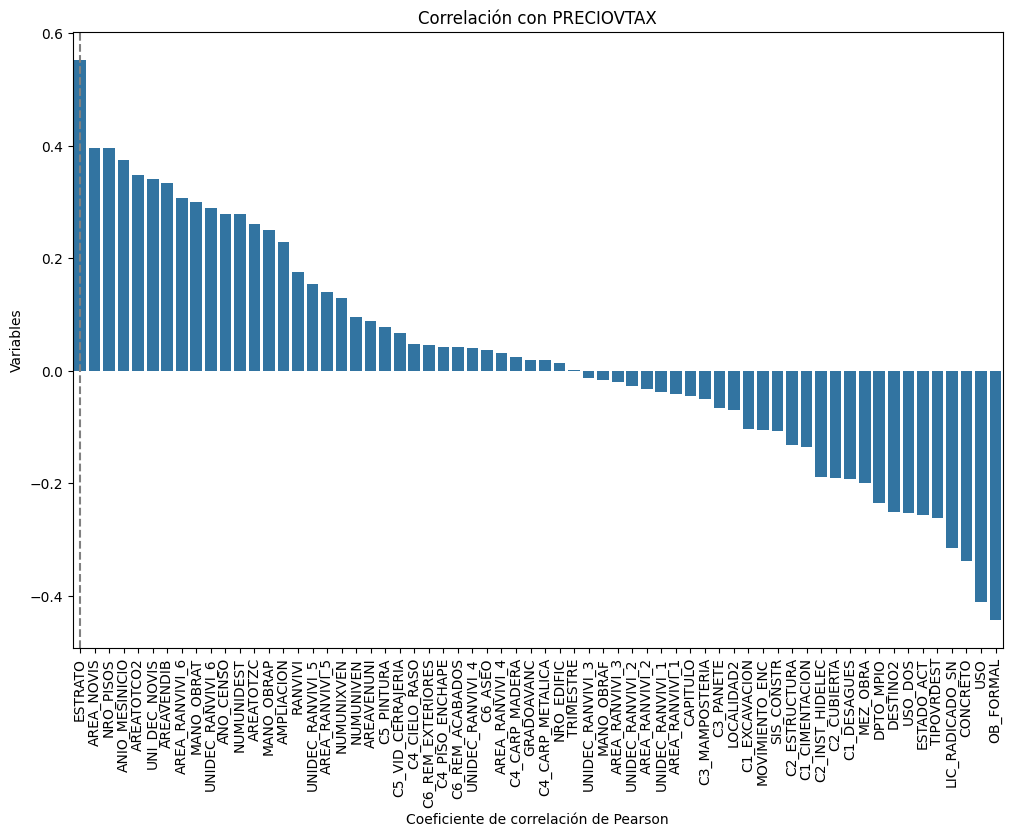

In [19]:
plot_correlation_matrix(
    df_combined,
    num_cols,
    target=TARGET
)

In [20]:
for col, nulos in val_nulos(df_combined).items():
    print(f"{col}: {nulos}")

DPTO_MPIO: [0]
ANO_CENSO: [0]
TRIMESTRE: [0]
DESTINO2: [0]
ESTADO_ACT: [0]
ESTRATO: [0]
LOCALIDAD2: [0]
AMPLIACION: [4]
OB_FORMAL: [0]
USO: [0]
USO_DOS: [62411]
AREATOTZC: [0]
SIS_CONSTR: [9089]
MANO_OBRAP: [0]
MANO_OBRAT: [0]
MANO_OBRAF: [2114]
AREAVENDIB: [0]
NUMUNIDEST: [0]
NUMUNIVEN: [0]
NUMUNIXVEN: [0]
NRO_EDIFIC: [0]
NRO_PISOS: [0]
CAPITULO: [0]
GRADOAVANC: [0]
TIPOVRDEST: [0]
PRECIOVTAX: [0]
AREATOTCO2: [0]
AREAVENUNI: [0]
RANVIVI: [0]
MEZ_OBRA: [195043]
CONCRETO: [195044]
LIC_RADICADO_SN: [65161]
C1_EXCAVACION: [12864]
C1_CIMENTACION: [12834]
C1_DESAGUES: [9447]
C2_ESTRUCTURA: [1076]
C2_INST_HIDELEC: [1015]
C2_CUBIERTA: [1079]
C3_MAMPOSTERIA: [1732]
C3_PANETE: [4595]
C4_PISO_ENCHAPE: [4493]
C4_CARP_METALICA: [1715]
C4_CARP_MADERA: [13990]
C4_CIELO_RASO: [15645]
C5_VID_CERRAJERIA: [1016]
C5_PINTURA: [5070]
C6_REM_EXTERIORES: [4123]
C6_REM_ACABADOS: [5283]
C6_ASEO: [1080]
UNI_DEC_NOVIS: [201467]
UNIDEC_RANVIVI_1: [0]
UNIDEC_RANVIVI_2: [0]
UNIDEC_RANVIVI_3: [0]
UNIDEC_RANVIVI_4: [

### Hacer mas limpieza

In [21]:
ID_COLS = [
    "MEZ_OBRA",
    "CONCRETO"      
]
df_combined_new = delate_column(df_combined, ID_COLS)

In [22]:
# Ejemplo de uso:
valor_definido = 0  # Cambia este valor por el que desees
df_combined_new = fill_null_column(df_combined_new, "AREA_NOVIS", valor_definido)

In [23]:
df_combined_new = fill_null_column(df_combined_new, "UNI_DEC_NOVIS", valor_definido)

In [24]:
# Lista de columnas objetivo y sus valores de nulos (solo usamos los nombres)
cols_a_rellenar = [
    "C1_EXCAVACION", "C1_CIMENTACION", "C1_DESAGUES", "C2_ESTRUCTURA", "C2_INST_HIDELEC",
    "C2_CUBIERTA", "C3_MAMPOSTERIA", "C3_PANETE", "C4_PISO_ENCHAPE", "C4_CARP_METALICA",
    "C4_CARP_MADERA", "C4_CIELO_RASO", "C5_VID_CERRAJERIA", "C5_PINTURA",
    "C6_REM_EXTERIORES", "C6_REM_ACABADOS", "C6_ASEO"
]

for col in cols_a_rellenar:
    valor_definido = df_combined_new[col].mean()  # Obtener el valor mediano de la columna
    df_combined_new = fill_null_column(df_combined_new, col, valor_definido)

In [25]:
df_combined_new = df_combined_new.filter(~pl.col("AMPLIACION").is_null()) # Elimina filas porque no hay tantos invalidos
df_combined_new = df_combined_new.filter(~pl.col("ANIO_MESINICIO").is_null()) # Elimina filas porque no hay tantos invalidos

In [26]:
for col, nulos in val_nulos(df_combined_new).items():
    print(f"{col}: {nulos}")

DPTO_MPIO: [0]
ANO_CENSO: [0]
TRIMESTRE: [0]
DESTINO2: [0]
ESTADO_ACT: [0]
ESTRATO: [0]
LOCALIDAD2: [0]
AMPLIACION: [0]
OB_FORMAL: [0]
USO: [0]
USO_DOS: [61150]
AREATOTZC: [0]
SIS_CONSTR: [3616]
MANO_OBRAP: [0]
MANO_OBRAT: [0]
MANO_OBRAF: [2085]
AREAVENDIB: [0]
NUMUNIDEST: [0]
NUMUNIVEN: [0]
NUMUNIXVEN: [0]
NRO_EDIFIC: [0]
NRO_PISOS: [0]
CAPITULO: [0]
GRADOAVANC: [0]
TIPOVRDEST: [0]
PRECIOVTAX: [0]
AREATOTCO2: [0]
AREAVENUNI: [0]
RANVIVI: [0]
LIC_RADICADO_SN: [63990]
C1_EXCAVACION: [0]
C1_CIMENTACION: [0]
C1_DESAGUES: [0]
C2_ESTRUCTURA: [0]
C2_INST_HIDELEC: [0]
C2_CUBIERTA: [0]
C3_MAMPOSTERIA: [0]
C3_PANETE: [0]
C4_PISO_ENCHAPE: [0]
C4_CARP_METALICA: [0]
C4_CARP_MADERA: [0]
C4_CIELO_RASO: [0]
C5_VID_CERRAJERIA: [0]
C5_PINTURA: [0]
C6_REM_EXTERIORES: [0]
C6_REM_ACABADOS: [0]
C6_ASEO: [0]
UNI_DEC_NOVIS: [0]
UNIDEC_RANVIVI_1: [0]
UNIDEC_RANVIVI_2: [0]
UNIDEC_RANVIVI_3: [0]
UNIDEC_RANVIVI_4: [0]
UNIDEC_RANVIVI_5: [0]
UNIDEC_RANVIVI_6: [0]
AREA_RANVIVI_1: [0]
AREA_RANVIVI_2: [0]
AREA_RANVIV

In [43]:
df_combined_new.head(1)

DPTO_MPIO,ANO_CENSO,TRIMESTRE,DESTINO2,ESTADO_ACT,ESTRATO,LOCALIDAD2,AMPLIACION,OB_FORMAL,USO,USO_DOS,AREATOTZC,SIS_CONSTR,MANO_OBRAP,MANO_OBRAT,MANO_OBRAF,AREAVENDIB,NUMUNIDEST,NUMUNIVEN,NUMUNIXVEN,NRO_EDIFIC,NRO_PISOS,CAPITULO,GRADOAVANC,TIPOVRDEST,PRECIOVTAX,AREATOTCO2,AREAVENUNI,RANVIVI,LIC_RADICADO_SN,C1_EXCAVACION,C1_CIMENTACION,C1_DESAGUES,C2_ESTRUCTURA,C2_INST_HIDELEC,C2_CUBIERTA,C3_MAMPOSTERIA,C3_PANETE,C4_PISO_ENCHAPE,C4_CARP_METALICA,C4_CARP_MADERA,C4_CIELO_RASO,C5_VID_CERRAJERIA,C5_PINTURA,C6_REM_EXTERIORES,C6_REM_ACABADOS,C6_ASEO,UNI_DEC_NOVIS,UNIDEC_RANVIVI_1,UNIDEC_RANVIVI_2,UNIDEC_RANVIVI_3,UNIDEC_RANVIVI_4,UNIDEC_RANVIVI_5,UNIDEC_RANVIVI_6,AREA_RANVIVI_1,AREA_RANVIVI_2,AREA_RANVIVI_3,AREA_RANVIVI_4,AREA_RANVIVI_5,AREA_RANVIVI_6,AREA_NOVIS,MOVIMIENTO_ENC,ANIO_MESINICIO
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,i64,i64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,i64,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,i32
25473,2012,3,4,2,2,0,2,2,2,3,0.0,2,0,0,0.0,66.0,1,0,0,1,1,2,100,2,500.0,66,66.0,2,2,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0.0,66.0,0.0,0.0,0.0,0.0,0.0,1,2012


In [28]:
num_cols = [
    col for col, dtype in zip(df_combined_new.columns, df_combined_new.dtypes)
    if dtype in (pl.Int8, pl.Int16, pl.Int32, pl.Int64, pl.UInt8, pl.UInt16, pl.UInt32, pl.UInt64, pl.Float32, pl.Float64)
]

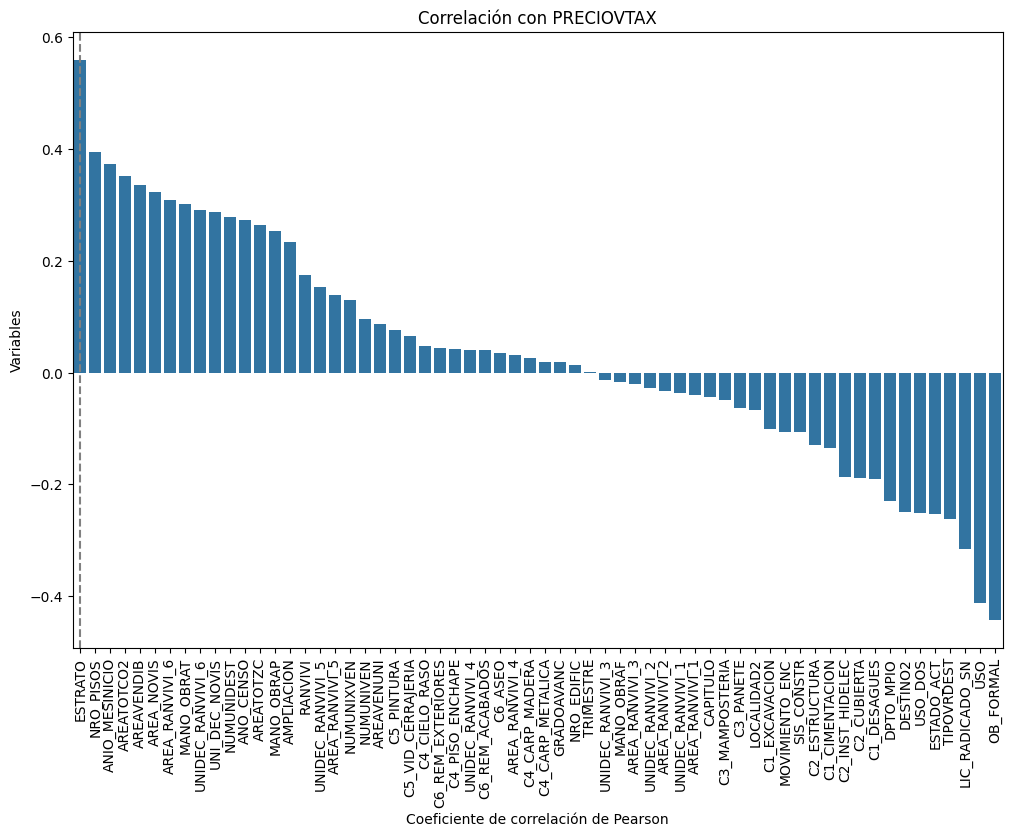

In [29]:
plot_correlation_matrix(
    df_combined_new,
    num_cols,
    target=TARGET
)

In [30]:
corr_target_new = corr_with_target(df_combined_new, num_cols, TARGET).sort("pearson_corr", descending=True)
with pl.Config(tbl_rows=-1, tbl_cols=-1):
    print(corr_target_new)

shape: (62, 2)
┌───────────────────┬──────────────┐
│ variable          ┆ pearson_corr │
│ ---               ┆ ---          │
│ str               ┆ f64          │
╞═══════════════════╪══════════════╡
│ ESTRATO           ┆ 0.559981     │
│ NRO_PISOS         ┆ 0.395195     │
│ ANIO_MESINICIO    ┆ 0.374296     │
│ AREATOTCO2        ┆ 0.35159      │
│ AREAVENDIB        ┆ 0.33529      │
│ AREA_NOVIS        ┆ 0.323387     │
│ AREA_RANVIVI_6    ┆ 0.309119     │
│ MANO_OBRAT        ┆ 0.3011       │
│ UNIDEC_RANVIVI_6  ┆ 0.291215     │
│ UNI_DEC_NOVIS     ┆ 0.288207     │
│ NUMUNIDEST        ┆ 0.279299     │
│ ANO_CENSO         ┆ 0.273119     │
│ AREATOTZC         ┆ 0.263721     │
│ MANO_OBRAP        ┆ 0.253249     │
│ AMPLIACION        ┆ 0.233577     │
│ RANVIVI           ┆ 0.174522     │
│ UNIDEC_RANVIVI_5  ┆ 0.15366      │
│ AREA_RANVIVI_5    ┆ 0.139628     │
│ NUMUNIXVEN        ┆ 0.130216     │
│ NUMUNIVEN         ┆ 0.096007     │
│ AREAVENUNI        ┆ 0.08776      │
│ C5_PINTURA        ┆ 0

### Ultima etapa de limpieza

In [31]:
valor_definido = df_combined_new["MANO_OBRAF"].mean()  # Obtener el valor mediano de la columna
df_combined_new = fill_null_column(df_combined_new, "MANO_OBRAF", valor_definido)

In [32]:
valor_definido = 0  # Cambia este valor por el que desees
df_combined_new = fill_null_column(df_combined_new, "LIC_RADICADO_SN", valor_definido)

In [33]:
valor_definido = 0  # Cambia este valor por el que desees
df_combined_new = fill_null_column(df_combined_new, "USO_DOS", valor_definido)

In [34]:
valor_definido = 0  # Cambia este valor por el que desees
df_combined_new = fill_null_column(df_combined_new, "SIS_CONSTR", valor_definido)

In [35]:
num_cols = [
    col for col, dtype in zip(df_combined_new.columns, df_combined_new.dtypes)
    if dtype in (pl.Int8, pl.Int16, pl.Int32, pl.Int64, pl.UInt8, pl.UInt16, pl.UInt32, pl.UInt64, pl.Float32, pl.Float64)
]

In [36]:
df_combined_new.head()

DPTO_MPIO,ANO_CENSO,TRIMESTRE,DESTINO2,ESTADO_ACT,ESTRATO,LOCALIDAD2,AMPLIACION,OB_FORMAL,USO,USO_DOS,AREATOTZC,SIS_CONSTR,MANO_OBRAP,MANO_OBRAT,MANO_OBRAF,AREAVENDIB,NUMUNIDEST,NUMUNIVEN,NUMUNIXVEN,NRO_EDIFIC,NRO_PISOS,CAPITULO,GRADOAVANC,TIPOVRDEST,PRECIOVTAX,AREATOTCO2,AREAVENUNI,RANVIVI,LIC_RADICADO_SN,C1_EXCAVACION,C1_CIMENTACION,C1_DESAGUES,C2_ESTRUCTURA,C2_INST_HIDELEC,C2_CUBIERTA,C3_MAMPOSTERIA,C3_PANETE,C4_PISO_ENCHAPE,C4_CARP_METALICA,C4_CARP_MADERA,C4_CIELO_RASO,C5_VID_CERRAJERIA,C5_PINTURA,C6_REM_EXTERIORES,C6_REM_ACABADOS,C6_ASEO,UNI_DEC_NOVIS,UNIDEC_RANVIVI_1,UNIDEC_RANVIVI_2,UNIDEC_RANVIVI_3,UNIDEC_RANVIVI_4,UNIDEC_RANVIVI_5,UNIDEC_RANVIVI_6,AREA_RANVIVI_1,AREA_RANVIVI_2,AREA_RANVIVI_3,AREA_RANVIVI_4,AREA_RANVIVI_5,AREA_RANVIVI_6,AREA_NOVIS,MOVIMIENTO_ENC,ANIO_MESINICIO
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,i64,i64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,i64,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,i32
25473,2012,3,4,2,2,0,2,2,2,3,0.0,2,0,0,0.0,66.0,1,0,0,1,1,2,100,2,500.0,66,66.0,2,2,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0.0,66.0,0.0,0.0,0.0,0.0,0.0,1,2012
17001,2015,2,4,2,2,5,1,2,2,3,0.0,2,0,0,0.0,73.0,1,0,0,1,1,1,100,1,720.0,73,73.0,3,2,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,3,2015
54001,2021,2,4,7,2,0,1,2,2,3,0.0,2,0,0,0.0,20.0,1,0,0,1,1,3,100,2,750.0,20,20.0,1,2,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,6,2013
52001,2012,3,4,1,2,4,1,2,2,3,0.0,2,0,1,0.0,40.0,1,0,0,1,1,5,10,1,760.0,40,40.0,1,2,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,10.0,10.0,0.0,0.0,0.0,0,1,0,0,0,0,0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2012
5001,2015,3,1,3,2,8,2,2,2,1,30.0,1,0,0,0.0,470.0,7,0,0,1,4,6,100,1,1000.0,500,67.142857,4,2,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0,0,0,0,7,0,0,0.0,0.0,0.0,500.0,0.0,0.0,0.0,7,2014


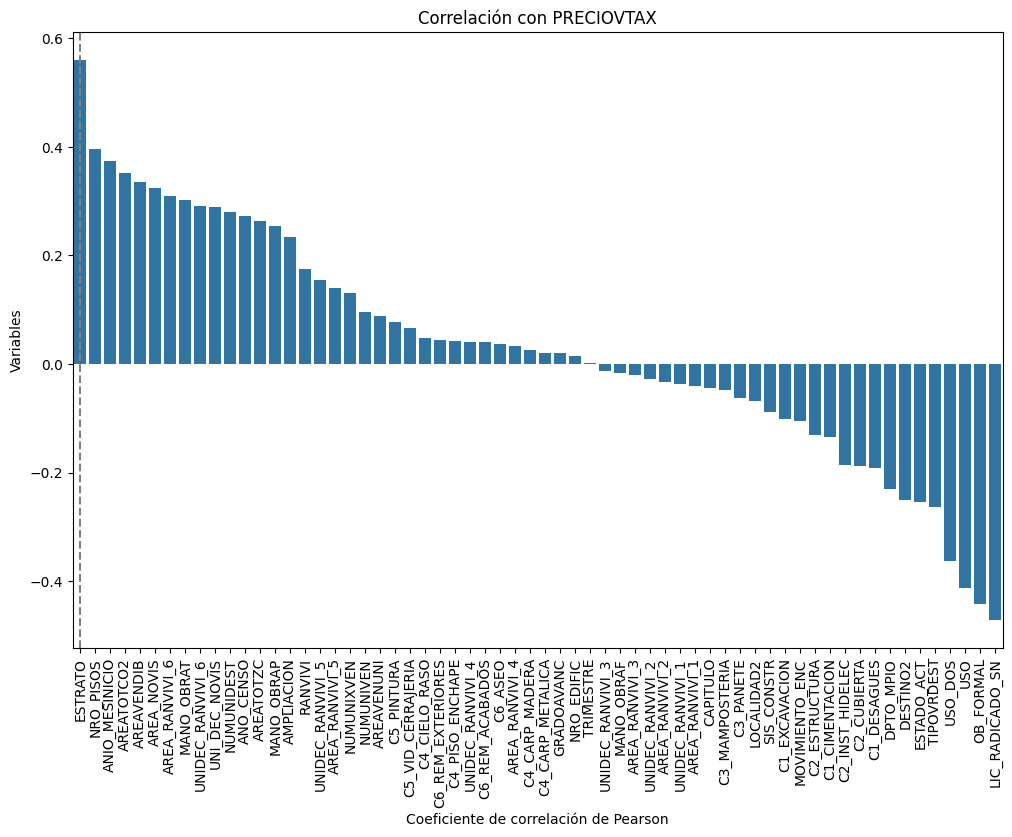

In [37]:
plot_correlation_matrix(
    df_combined_new,
    num_cols,
    target=TARGET
)

In [38]:
corr_target_new = corr_with_target(df_combined_new, num_cols, TARGET).sort("pearson_corr", descending=True)
with pl.Config(tbl_rows=-1, tbl_cols=-1):
    print(corr_target_new)

shape: (62, 2)
┌───────────────────┬──────────────┐
│ variable          ┆ pearson_corr │
│ ---               ┆ ---          │
│ str               ┆ f64          │
╞═══════════════════╪══════════════╡
│ ESTRATO           ┆ 0.559981     │
│ NRO_PISOS         ┆ 0.395195     │
│ ANIO_MESINICIO    ┆ 0.374296     │
│ AREATOTCO2        ┆ 0.35159      │
│ AREAVENDIB        ┆ 0.33529      │
│ AREA_NOVIS        ┆ 0.323387     │
│ AREA_RANVIVI_6    ┆ 0.309119     │
│ MANO_OBRAT        ┆ 0.3011       │
│ UNIDEC_RANVIVI_6  ┆ 0.291215     │
│ UNI_DEC_NOVIS     ┆ 0.288207     │
│ NUMUNIDEST        ┆ 0.279299     │
│ ANO_CENSO         ┆ 0.273119     │
│ AREATOTZC         ┆ 0.263721     │
│ MANO_OBRAP        ┆ 0.253249     │
│ AMPLIACION        ┆ 0.233577     │
│ RANVIVI           ┆ 0.174522     │
│ UNIDEC_RANVIVI_5  ┆ 0.15366      │
│ AREA_RANVIVI_5    ┆ 0.139628     │
│ NUMUNIXVEN        ┆ 0.130216     │
│ NUMUNIVEN         ┆ 0.096007     │
│ AREAVENUNI        ┆ 0.08776      │
│ C5_PINTURA        ┆ 0

In [39]:
for col, nulos in val_nulos(df_combined_new).items():
    print(f"{col}: {nulos}")

DPTO_MPIO: [0]
ANO_CENSO: [0]
TRIMESTRE: [0]
DESTINO2: [0]
ESTADO_ACT: [0]
ESTRATO: [0]
LOCALIDAD2: [0]
AMPLIACION: [0]
OB_FORMAL: [0]
USO: [0]
USO_DOS: [0]
AREATOTZC: [0]
SIS_CONSTR: [0]
MANO_OBRAP: [0]
MANO_OBRAT: [0]
MANO_OBRAF: [0]
AREAVENDIB: [0]
NUMUNIDEST: [0]
NUMUNIVEN: [0]
NUMUNIXVEN: [0]
NRO_EDIFIC: [0]
NRO_PISOS: [0]
CAPITULO: [0]
GRADOAVANC: [0]
TIPOVRDEST: [0]
PRECIOVTAX: [0]
AREATOTCO2: [0]
AREAVENUNI: [0]
RANVIVI: [0]
LIC_RADICADO_SN: [0]
C1_EXCAVACION: [0]
C1_CIMENTACION: [0]
C1_DESAGUES: [0]
C2_ESTRUCTURA: [0]
C2_INST_HIDELEC: [0]
C2_CUBIERTA: [0]
C3_MAMPOSTERIA: [0]
C3_PANETE: [0]
C4_PISO_ENCHAPE: [0]
C4_CARP_METALICA: [0]
C4_CARP_MADERA: [0]
C4_CIELO_RASO: [0]
C5_VID_CERRAJERIA: [0]
C5_PINTURA: [0]
C6_REM_EXTERIORES: [0]
C6_REM_ACABADOS: [0]
C6_ASEO: [0]
UNI_DEC_NOVIS: [0]
UNIDEC_RANVIVI_1: [0]
UNIDEC_RANVIVI_2: [0]
UNIDEC_RANVIVI_3: [0]
UNIDEC_RANVIVI_4: [0]
UNIDEC_RANVIVI_5: [0]
UNIDEC_RANVIVI_6: [0]
AREA_RANVIVI_1: [0]
AREA_RANVIVI_2: [0]
AREA_RANVIVI_3: [0]
AREA_

In [40]:
df_combined_new.shape

(290550, 63)

In [41]:
df_combined_new.write_csv(PREP_DIR / "dataset_prueba_limpia.csv")